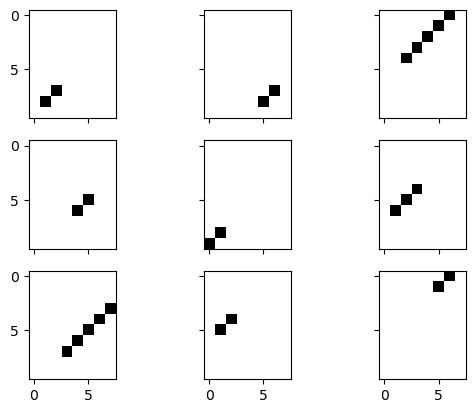

In [5]:
import numpy as np
import itertools as iTools
import random
from matplotlib.pylab import subplots, cm
def gen_rand_slash(m=6,n=6,direction='back'):
    '''To debug an image processing algorithm, you have to generate a 
    large number of exemplar training images that consist of such Numpy arrays.
    :m param: Int
    :n param: int
    :direction param: string
    '''
    assert type(m)==int and type(n)==int and type(direction)==str,'wrong m,n'
    assert m>=2 and n>=2,'wrong range of m,n'
    assert direction=='back' or direction=='forward','wrong direction input'

    matrix = np.zeros((m,n),dtype='int')
    mAxisStart = random.randint(1,m-1)
    nAxisStart = random.randint(1,n-1)
    maxInMDir = m-mAxisStart
    maxInNDir = n-nAxisStart
    stopInd = min(maxInMDir,maxInNDir)
    mPosStop =  mAxisStart + random.randint(1,stopInd)
    nPosStop =  nAxisStart + random.randint(1,stopInd)
    mInd = list(range(mAxisStart,mPosStop+1,1))
    nInd = list(range(nAxisStart,nPosStop+1,1))
    
    if len(mInd)>len(nInd):
        mInd = mInd[:len(nInd)]
    elif len(nInd)>len(mInd):
        nInd = nInd[:len(mInd)]
    
    points = list(map(list,zip(mInd,nInd)))
    offset = np.array([1,1])
    modPoints =np.array([list((np.array(elem)-offset).T) for elem in points])
    for elem in modPoints:
        matrix[elem[0],elem[1]]=1
    if(direction=='forward'):
        return matrix
    else:
        return np.fliplr(matrix)
    


if __name__=='__main__':
    fig,axs=subplots(3,3,sharex=True,sharey=True)
    for ax in axs.flatten():
        ax.imshow(gen_rand_slash(10,8,'back'),cmap=cm.gray_r)
